In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pqcd

from scipy.integrate import cumulative_trapezoid
from pqcd.utils import (
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre,
    nsat
    )

In [2]:
crust = pd.read_csv('../make-agnostic-processes/ingo-bps-with-cs2c2.csv')

In [3]:
crust

,baryon_density,pressurec2,energy_densityc2,cs2c2
0,6.690488e+00,1.123602e-13,7.757621e+00,1.694600e-11
1,7.911502e+00,1.123602e-12,7.817296e+00,1.355688e-10
2,7.961680e+00,1.123602e-11,7.857078e+00,3.304493e-10
3,8.212574e+00,1.123602e-10,8.105720e+00,3.831341e-10
4,1.169163e+01,1.346106e-09,1.153698e+01,1.670024e-09
...,...,...,...,...
73,1.070478e+14,4.951233e+11,1.079919e+14,7.578690e-03
74,1.137383e+14,5.478749e+11,1.147740e+14,7.983989e-03
75,1.204288e+14,6.034447e+11,1.215592e+14,8.402345e-03
76,1.271193e+14,6.619255e+11,1.283475e+14,8.781323e-03


In [4]:
pressurec2 = crust['pressurec2'].values
energy_densityc2 = crust['energy_densityc2'].values
baryon_density = crust['baryon_density'].values

In [5]:
I = cumulative_trapezoid(
    pressurec2/(energy_densityc2 + pressurec2), 
    x=np.log(energy_densityc2), 
    initial=0
    )

In [6]:
baryon_density_modified = energy_densityc2*np.exp(-I)

In [7]:
cs2c2_modified = np.gradient(pressurec2, energy_densityc2)

In [8]:
crust_modified = pd.DataFrame({
    'baryon_density': baryon_density_modified,
    'pressurec2': pressurec2,
    'energy_densityc2': energy_densityc2,
    'cs2c2': cs2c2_modified
    })

In [9]:
crust_modified

,baryon_density,pressurec2,energy_densityc2,cs2c2
0,7.757621e+00,1.123602e-13,7.757621e+00,1.694600e-11
1,7.817296e+00,1.123602e-12,7.817296e+00,1.592937e-10
2,7.857078e+00,1.123602e-11,7.857078e+00,2.752282e-10
3,8.105720e+00,1.123602e-10,8.105720e+00,4.035215e-10
4,1.153698e+01,1.346106e-09,1.153698e+01,1.455585e-09
...,...,...,...,...
73,1.060385e+14,4.951233e+11,1.079919e+14,7.578643e-03
74,1.126659e+14,5.478749e+11,1.147740e+14,7.983941e-03
75,1.192933e+14,6.034447e+11,1.215592e+14,8.402295e-03
76,1.259207e+14,6.619255e+11,1.283475e+14,8.781285e-03


In [10]:
crust_modified.to_csv(
    '../make-agnostic-processes/ingo-bps-with-cs2c2-modified.csv', 
    index=False, 
    float_format='%.18e'
    )

In [11]:
pressure = to_GeV_per_cubic_femtometre(crust_modified.pressurec2)
energy_density = to_GeV_per_cubic_femtometre(crust_modified.energy_densityc2)
number_density = to_nucleons_per_cubic_femtometre(crust_modified.baryon_density)

chemical_potential = (energy_density+pressure)/number_density

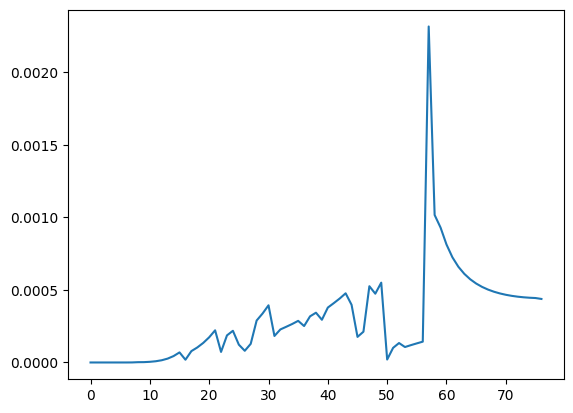

In [12]:
fig, ax = plt.subplots()
_ = ax.plot(np.diff(chemical_potential))